In [24]:
import sys
from glob import glob
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

from xrt import load_xrt, curves
from uvot import load_uvotsource, filters, filter_colors
from get_closest_srcreg import get_src_region_dict
from source_names_dict import source_names_dict, source_names_readable

In [8]:
src_region_dict = get_src_region_dict()

Getting source region dict


In [10]:
lcs = {}

for simbad_name, local_name in source_names_dict.items():
    try:
        lcs[simbad_name] = load_uvotsource(simbad_name, src_region_dict)
    except Exception as e:
        print(f'{simbad_name:<40} {e}')

In [17]:
lc_mean = {}
for simbad_name, lc in lcs.items():
    try:
        lc_mean[simbad_name] = lc['MAG'].mean()
    except Exception as e:
        print(f'{simbad_name:<30} {e}')
    
lc_mean

ESO_243-49_HLX-1               'NoneType' object is not subscriptable
[SST2011]_J141939.39+564137.8  'NoneType' object is not subscriptable
[LB2005]_NGC_5236_X11          'NoneType' object is not subscriptable
NAME_M83_ULX-1                 'NoneType' object is not subscriptable


{'NAME_Holmberg_IX_X-1': 19.158024,
 'Holmberg_II_X-1': 16.276596,
 'M31_ULX-1': 18.677912,
 '[LM2005]_NGC_598_ULX1': 14.521144,
 'RX_J133001+47137': 15.534088,
 '[LM2005]_NGC_3031_ULX1': 18.114943,
 'M82_X-2': 16.609524,
 '[LM2005]_NGC_1042_ULX1': 18.673836,
 'NAME_NGC_1313_X-1': 16.503675,
 'NAME_NGC_1313_X-2': 19.026127,
 '[LM2005]_NGC_247_ULX1': 17.137005,
 '[LB2005]_NGC_253_X2': 16.744873,
 '[LB2005]_NGC_253_X9': 17.31925,
 'NAME_NGC_300_ULX1': 17.4565,
 '[LM2005]_NGC_4395_ULX1': 18.210741,
 '[LM2005]_NGC_5204_ULX1': 16.244524,
 '[LM2005]_NGC_5408_ULX1': 15.906125,
 '[SRW2006b]_NGC_55_ULX': 17.784481,
 'NAME_NGC_5907_ULX': 18.692287,
 '[LB2005]_NGC_6946_ULX1': 18.011051,
 '[LB2005]_NGC_6946_ULX3': 18.673061,
 'NAME_NGC_7090_ULX3': 17.643633,
 'NAME_NGC_7793_P13': 19.849335,
 'NAME_NGC_925_ULX-1': 17.879503,
 'NAME_NGC_925_ULX-2': 17.609411,
 'SMC_X-3': 13.462403,
 'SS433': 17.4149,
 'SWIFT_J0243.6+6124': 14.528508,
 'NAME_UGC_6456_ULX': 17.167513,
 'NOVA_Cyg_1989': 17.460901,
 'NA

In [18]:
simbad_names_by_mean = sorted(lc_mean, key=lc_mean.get)
simbad_names_by_mean

['SMC_X-3',
 '[LM2005]_NGC_598_ULX1',
 'SWIFT_J0243.6+6124',
 'RX_J133001+47137',
 '[SK2009]_X2',
 '[LM2005]_NGC_5408_ULX1',
 '[LM2005]_NGC_5204_ULX1',
 'Holmberg_II_X-1',
 'NAME_NGC_1313_X-1',
 'M82_X-2',
 '[LB2005]_NGC_253_X2',
 '[LM2005]_NGC_4559_ULX1',
 '[LM2005]_NGC_247_ULX1',
 'NAME_UGC_6456_ULX',
 '[LB2005]_NGC_253_X9',
 'SS433',
 'NAME_NGC_300_ULX1',
 'NOVA_Cyg_1989',
 'NAME_NGC_925_ULX-2',
 'NAME_NGC_7090_ULX3',
 '[SRW2006b]_NGC_55_ULX',
 'NAME_NGC_925_ULX-1',
 '[LB2005]_NGC_6946_ULX1',
 '[LM2005]_NGC_3031_ULX1',
 '[LM2005]_NGC_4395_ULX1',
 'NAME_NGC_1365-X1',
 '[WMR2006]_NGC4945_XMM1',
 '[LB2005]_NGC_6946_ULX3',
 '[LM2005]_NGC_1042_ULX1',
 'M31_ULX-1',
 'NAME_NGC_5907_ULX',
 'NAME_NGC_1313_X-2',
 'NAME_Holmberg_IX_X-1',
 'NAME_IC_10_X-1',
 'NAME_NGC_7793_P13']

/home/x1/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3472: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/x1/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/x1/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3472: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/x1/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/x1/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3472: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/x1/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / 

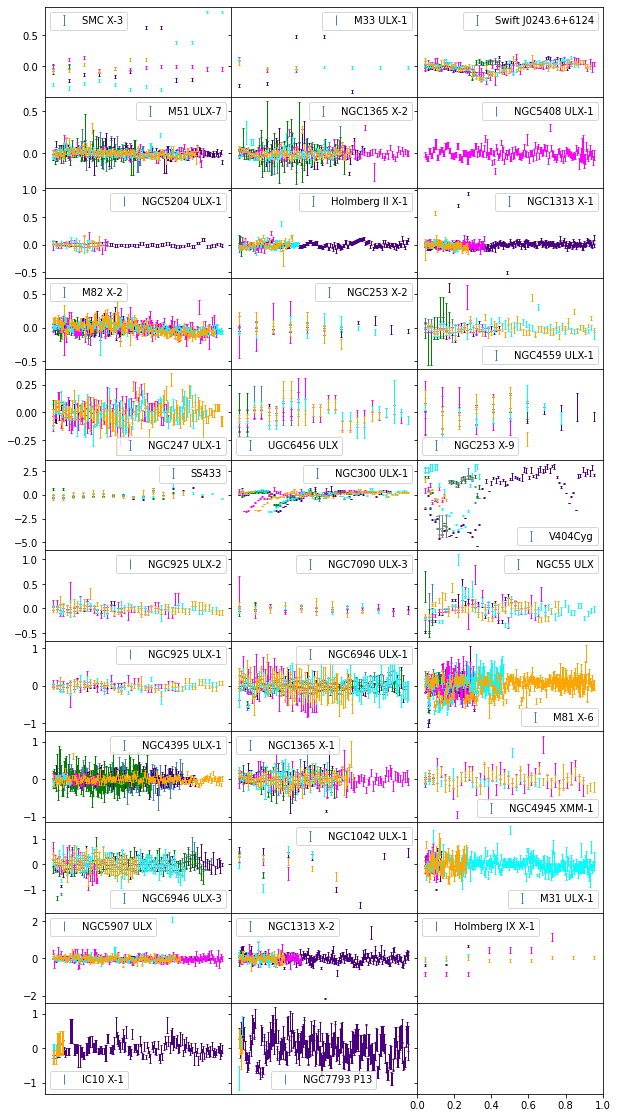

In [32]:
fig, ax = plt.subplots(int(len(simbad_names_by_mean)/3)+1,3, figsize=(10,20), sharey='row')
axes = ax.flatten()
i=0
for simbad_name in simbad_names_by_mean:
    lc = lcs[simbad_name]
    readable_name = source_names_readable[simbad_name]
    
    for j, f in enumerate(filters):
        sub = lc[lc['FILTER'] == f]
        xplot = np.arange(len(sub)) 
        yplot = sub['MAG']- np.mean(sub['MAG'])
        yerr  = sub['MAG_ERR']

        if j==0:
            axes[i].errorbar(x=xplot, y=yplot, yerr=yerr, label=readable_name, ls='none', lw=1.0, capsize=1.0, color=filter_colors[f])
        else:
            axes[i].errorbar(x=xplot, y=yplot, yerr=yerr, ls='none', lw=1.0, capsize=1.0, color=filter_colors[f])

    #axes[i].text(s=readable_name, x=len(lc['RATE'])+5, y=np.mean(lc['RATE']))
    #axes[i].set_title(readable_name)
    axes[i].legend()
    #axes[i].axis('off')
    axes[i].get_xaxis().set_visible(False)
    i+=1
    
plt.subplots_adjust(wspace=0, hspace=0)
#plt.tight_layout()

In [ ]:
LC = lcs_pc['NAME_NGC_7793_P13']
plt.figure(figsize=(10,8))
plt.errorbar(LC['MJD_0'], LC['RATE'], yerr=LC['RATE_ERR'], ls='none', lw=1.0, capsize=1.0, color='black')
#plt.xlim(2200, 3500)